ibm project name : real-time communicatiom system powered by ai for specially abled
team id:PNT2022TMID07105


IMPORT THE REQUIRED MODEL BULIDING LIBRARRIES

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9e2ebbcc4db04f3fb5d87e8fa4800e36 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='GN91c7sTtlR1DYfMzZqIUwGSIkATCCriPItR-s81P82-',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_1 = client_9e2ebbcc4db04f3fb5d87e8fa4800e36.get_object(Bucket='communicationmodeltraining-donotdelete-pr-xpzs67frbbb7s3', Key='Communication_Dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [ ]:
# Unzip the Dataset Zip File
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()), 'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [ ]:
%%bash
ls Communication_Dataset

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from PIL import Image
import pathlib

INITIALIZE THE MODEL                            

In [ ]:
from google.colab import drive

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print("This dataset has been created and uploaded by IBM-TeamID-EPBL/IBM-Project-25736-1659971804")

This dataset has been created and uploaded by IBM-TeamID-EPBL/IBM-Project-25736-1659971804


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True, vertical_flip=False)

In [ ]:
test_datagen= ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/conversation engine for deaf and dumb/Dataset/training_set',target_size=(64,64), batch_size=300,class_mode='categorical', color_mode = "grayscale")

Found 15750 images belonging to 9 classes.


In [ ]:
x_test = test_datagen.flow_from_directory('/content/drive/MyDrive/conversation engine for deaf and dumb/Dataset/test_set',target_size=(64,64), batch_size=300,
                                          class_mode='categorical', color_mode = "grayscale")

Found 2250 images belonging to 9 classes.


In [ ]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [ ]:
x_test.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [ ]:
#import imagedatagenerator
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#training datagen
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
#testing datagen
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
import tensorflow as tf
import os

In [ ]:
#create model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt #to view graph in colab itself
import IPython.display as display
from PIL import Image
import pathlib

In [ ]:
a=len(x_train)
b=len(x_test)

In [ ]:
print(a)

53


In [ ]:
print(b)

8


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [ ]:
#create model
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
#1st hidden layer
model.add(Dense(units=512,activation='relu'))
#2nd hidden layer
model.add(Dense(units=261,activation='relu'))

In [ ]:
#output layer
model.add(Dense(units=9,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
21/53 [==========>...................] - ETA: 1:14:45 - loss: 0.8305 - accuracy: 0.7195

SAVE THE MODEL


In [ ]:
model.save('aslpng2.h5')

In [ ]:
# Convert the Saved Model to a Tar Compressed Format
!tar -zcvf IBM_TrainedModel.tgz IBM_Communication_Model.h5

In [ ]:
%%bash
ls -ll

watson  machine learning

In [ ]:
!pip install watson-machine-learning-client --upgrade

In [ ]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "mNVF7E95G-awR213njShj1GiUfN-1SpPq-ko8Wx7na1-"
}

client = APIClient(wml_credentials)

save to deployment space

In [ ]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [ ]:
space_uid = guid_from_space_name(client, 'communication_model_deployment')
print("Space UID : ", space_uid)

In [ ]:
client.set.default_space(space_uid)

In [ ]:
client.software_specifications.list()

In [ ]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

In [ ]:
model_details = client.repository.store_model(model='IBM_TrainedModel.tgz', meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7"})
model_id = client.repository.get_model_uid(model_details)

In [ ]:
model_id

MODEL CREATION

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [ ]:
model = load_model('aslpng2.h5')

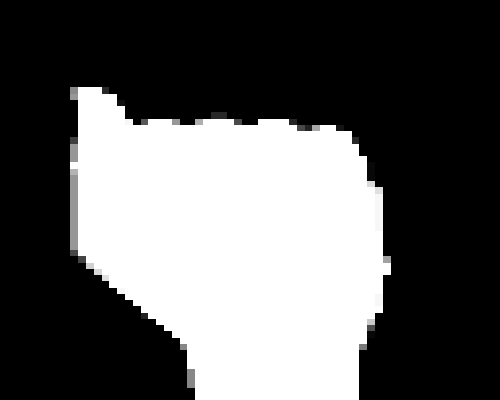

In [ ]:
img=image.load_img('/content/drive/MyDrive/conversation engine for deaf and dumb/Dataset/test_set/A/10.png',target_size=(400,500))
img

In [ ]:
from skimage.transform import resize
def detect(frame):
  img=resize(frame,(64,64,1))
  img=np.expand_dims(img,axis=0)
  if(np.max(img)>1):
    prediction=model.predict(img)
    print(prediction)
    prediction=model.predict_classes(img)
    print(prediction)

In [ ]:
arr= image.img_to_array(img)

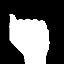

In [ ]:
frame=cv2.imread('/content/drive/MyDrive/conversation engine for deaf and dumb/Dataset/test_set/A/10.png')
data=detect(frame)
from google.colab.patches import cv2_imshow
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()